## Introduction to Dimensionality Reduction

When we do predictive analysis mainly, the number of independant that go into the modelling play an important role, in addition to the size of the dataset and the way it has been pre-processed. 

Since the independant variables, or the "predictors" actually play an important role in deciding the course of the outcomes, may it be supervised or unsupervised learning, it's crucial to choose the correct feature sets that best describes your data.

There are several definitions for Dimensionality Reduction, however, all in all, it is a process that reduces the number of features from a dataset whilst retaining the information. Usually, dimensionality reduction is done when you have a feature set that can be highly correlated, highly complex or just doesn't contribute to the outcome or improve the performance of the algorithm. Hence, our main goal with dimensionality reduction is to make the data less dimensional and preserve the information in the dataset.

Dimensionality Reduction can be done in different ways, with Principal Component Analysis (PCA) and t-SNE being one of them. 

For this project, two techniques will be used

1. PCA (Principal Component Analysis)
2. t-SNE (T-distributed Stochastic Neighbor Embedding)

As we often use Dimensionality Reduction as Feature Selection and Feature Extraction methods, in this project, we use it as a Feature Extraction method, where we attempt to derive a new feature set from the existing independant variables to construct an optimal feature subspace.


## Principal Component Analysis (PCA)

PCA (Principal Component Analysis) is a statistical technique that uses linear transformations to discover the most relevant features, or principal components, in high-dimensional datasets.
Hence, PCA creates a low-dimensional representation of a dataset and finds the most variable sequence of linear combinations of mutually uncorrelated variables. It can be used to display data in addition to giving derived variables for use in supervised learning tasks. 

This is particularly true when working with big amounts of data. PCA accomplishes this by transforming the data into a new set of variables known as principal components, which contain the data's most significant variations. Most researchers and people into data analysis can use PCA to focus on the most important features of data, making it easier to understand and work with. 

Since I have worked with PCA before, the sklearn library is a wonderful tool for this. 

For PCA, one of the important things is to get rid of any labels within the data. Hence, there is only a set of numerical variables. For this dataset, the highly correlated variables have already been removed to reduce multicollinearity of the dataset as much as possible. 

In [206]:
# Import Libraries 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import LabelEncoder


In [207]:
stackeddf= pd.read_csv("../data/stackeddf.csv")

stackeddf.head(10)

,year,adj_NNI_g,adj_savings_fix_cap_GNI,adj_savings_edu_GNI,adj_NNS_GNI,ex_imp_growth,ex_debt_shocks,fdi_net_outflows,gdp_growth,short_term_debt_tot_reserves,lending_interest_rate,life_exp_birth,expense_gdp,military expenditure,labels
0,-1.647859,1.230366,0.270892,-0.277537,-0.052004,0.419580,-1.270470,-0.842531,1.595002,-0.032164,-0.845342,-0.112698,-0.121526,-0.167829,High Growth
1,-1.572340,-1.216110,0.313510,-0.277537,0.103127,-0.481153,-1.204634,-0.842808,1.304262,0.403253,-0.845342,-0.110878,-0.141348,-0.151690,High Growth
2,-1.496821,-0.510146,0.367195,-0.277537,0.049534,0.536099,-0.969857,-0.842942,0.295912,0.851964,-0.845342,-0.109081,-0.105898,-0.102821,Moderate Growth
3,-1.421301,1.160350,0.316780,-0.277537,0.046547,-0.495731,-0.889487,-0.842495,1.815392,1.403674,-0.845342,-0.107310,-0.098738,-0.109603,Very High Growth
4,-1.345782,-0.472199,0.362786,-0.277537,0.058430,0.726138,-0.708319,-0.842596,0.433390,1.517825,-0.845342,-0.105584,-0.034063,-0.080748,Moderate Growth
5,-1.270263,-0.351675,0.434567,-0.277537,0.132578,-1.299124,-0.543663,-0.842744,1.004641,1.655880,-0.845342,-0.103913,0.040985,-0.033944,High Growth
6,-1.194744,-0.021989,0.439905,-0.277537,-0.046028,0.448600,-0.377613,-0.843166,0.814271,1.717391,-0.845342,-0.102297,0.099256,0.131376,Moderate Growth
7,-1.119224,0.331103,0.482043,-0.277537,0.103695,1.533911,-0.232320,-0.842619,0.491018,1.817072,-0.845342,-0.100749,0.125278,0.169781,Moderate Growth
8,-1.043705,0.612465,0.472153,-0.277537,0.323107,0.752206,-0.116249,-0.842141,2.747401,2.769720,-0.845342,-0.099258,0.110237,0.015163,Very High Growth
9,-0.968186,0.339376,0.482635,-0.277537,0.630367,1.422604,0.516698,-0.842224,1.280807,3.915796,-0.845342,-0.097787,0.137684,-0.044664,High Growth


Here, we see that the data has both numerical and categorical variables which have already been normalised using the standard scalar. It is preprocessing technique that uses the z-score normalisation method to ensure the features are all on a comparible scale, with a mean of zero and a standard deviation of 1. Hemce, we separate the data into 'x' and 'y' variables.

In [208]:
y = stackeddf['labels']
x = stackeddf.drop(['labels'], axis=1)

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)



In [209]:
pca1 = PCA()
pca_result = pca1.fit_transform(x)

print(pca_result)

[[ 7.62571967e-01 -6.26043200e-01 -2.30866090e-01 ... -3.68266626e-02
  -9.43207244e-03 -1.16249461e-12]
 [ 1.86852321e+00 -1.42033301e+00  1.23674495e-01 ...  2.85634458e-02
   2.13734846e-02 -2.92247919e-13]
 [ 1.78069560e+00 -6.75060179e-01 -7.31259179e-01 ...  5.53506048e-03
   2.15628745e-03 -1.56198277e-12]
 ...
 [ 2.00350774e+00 -3.63942297e+00 -1.87451963e+00 ...  1.76194346e-01
  -2.61901427e-02  3.58573041e-12]
 [ 5.11008136e-02 -1.05869012e+00 -2.55586066e+00 ...  7.92424281e-02
  -4.88649412e-02 -7.00359148e-12]
 [ 6.30703303e-01  1.25498085e+00 -2.37715116e+00 ...  1.25566938e-02
  -1.50273539e-02  2.09849158e-12]]


But, we need to find the optimal components of the data that best describes the data through the explained variance ratio, hence, we use the explained variance ratio and define our own threshold and see. 

Optimal Number of Components: 4


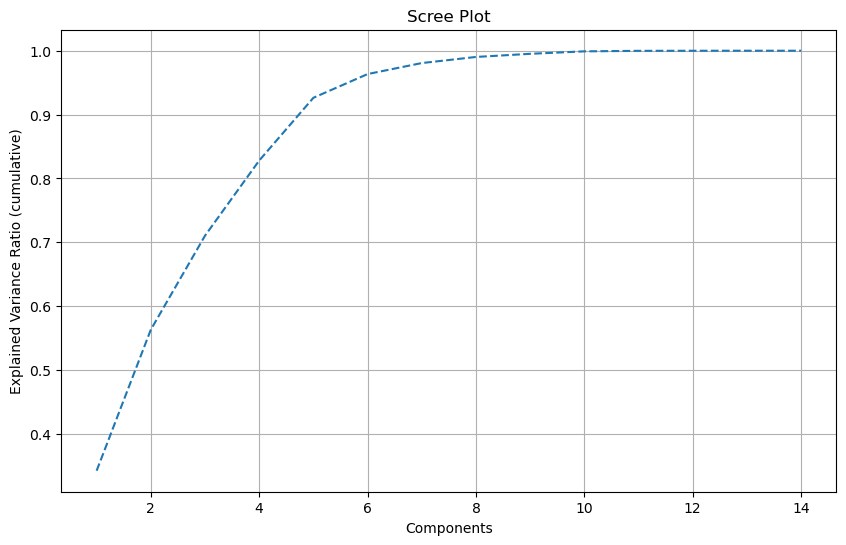

In [210]:
evr= pca1.explained_variance_ratio_
cum_var = np.cumsum(pca1.explained_variance_ratio_)
optimal = np.argmax(cum_var >= 0.75) + 1

print("Optimal Number of Components:", optimal)

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cum_var) + 1 ), cum_var, linestyle='--')
plt.xlabel('Components')
plt.ylabel('Explained Variance Ratio (cumulative)')
plt.title('Scree Plot')
plt.grid()
plt.show()

This shows me that the optimal number of components are 4 that attempts to explain at least 75% of the data. I have used 'Scree Plot' which visually showcases for a threshold of 0.75. Since we know the optimal components of the data, we can calculate the PCA

In [211]:
pca2 = PCA(n_components=4)
pca_optimal2 = pca2.fit_transform(x)

evr2 = pca2.explained_variance_ratio_
cev2 = np.cumsum(evr2)

print(pca_optimal2[0:10])

[[ 0.76257197 -0.6260432  -0.23086609 -2.59040608]
 [ 1.86852321 -1.42033301  0.1236745  -1.00166474]
 [ 1.7806956  -0.67506018 -0.73125918 -0.66213051]
 [ 1.73581487  0.08114664  0.88863619 -2.10613841]
 [ 1.91751146 -0.02151058 -0.62973654 -0.38327002]
 [ 2.71648514 -0.68755858  1.03310853 -0.8007282 ]
 [ 1.97349223  0.24045813 -0.25631107 -0.67853068]
 [ 1.42712716  0.85358937 -0.9723162  -0.45607911]
 [ 1.35839281  1.90954496  0.73221295 -1.18362437]
 [ 1.94311949  2.67844446  0.0827333   0.30600975]]


The following are the first few values of the pca. 

In [212]:
pcadf = pd.DataFrame(data=pca_optimal2, index=x.index, columns= ['PC1','PC2', 'PC3','PC4'])
pcadf.head(10)

,PC1,PC2,PC3,PC4
0,0.762572,-0.626043,-0.230866,-2.590406
1,1.868523,-1.420333,0.123674,-1.001665
2,1.780696,-0.675060,-0.731259,-0.662131
3,1.735815,0.081147,0.888636,-2.106138
4,1.917511,-0.021511,-0.629737,-0.383270
5,2.716485,-0.687559,1.033109,-0.800728
6,1.973492,0.240458,-0.256311,-0.678531
7,1.427127,0.853589,-0.972316,-0.456079
8,1.358393,1.909545,0.732213,-1.183624
9,1.943119,2.678444,0.082733,0.306010


In [213]:

print("Explained Variance Ratio for Each Component:")
print(evr2*100)

print("\nCumulative Explained Variance:")
print(cev2*100)

e = pca2.explained_variance_ratio_

# Print overall explained variance ratio
print("Overall Explained Variance Ratio:", sum(e)*100)

from sklearn.metrics import silhouette_samples

sil_val = silhouette_samples(pca_optimal2, y)
print(sil_val[0:10])

avg_sil_score = np.mean(sil_val)
print(f"Average Silhouette Score for PCA: {avg_sil_score}")





Explained Variance Ratio for Each Component:
[34.22972792 22.08761959 14.72048604 11.766315  ]

Cumulative Explained Variance:
[34.22972792 56.31734751 71.03783355 82.80414855]
Overall Explained Variance Ratio: 82.80414854824097
[-0.07892657 -0.02874872 -0.09320622 -0.16876901 -0.11519626  0.04725516
 -0.13561769 -0.0658181  -0.15181648  0.02498319]
Average Silhouette Score for PCA: -0.09704378289382186


As we have put in our threshold of 0.75, we see that the overall explained variance ratio, which talks about the proportion of variance captured by the dataset is 82%. You see even for each component, there are few points that perform better than the other. 

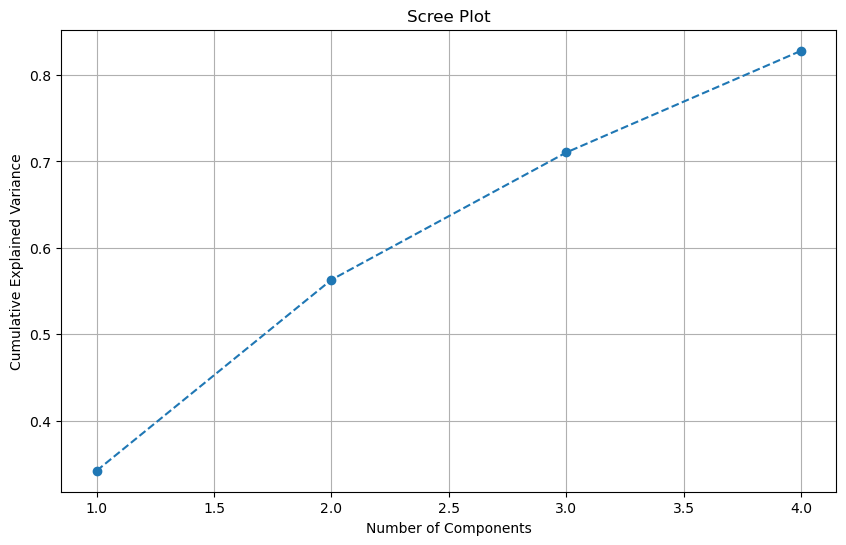

In [214]:

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(e) + 1), cev2, marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Scree Plot')
plt.grid()
plt.show()



Here, we see that the the optimal performance was for 4. As the components keep increasing, so did the explained cumulative values.

/var/folders/cm/1bq_zvw92w99j_5d1p5jq5v40000gn/T/ipykernel_46417/3805980677.py:5: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored



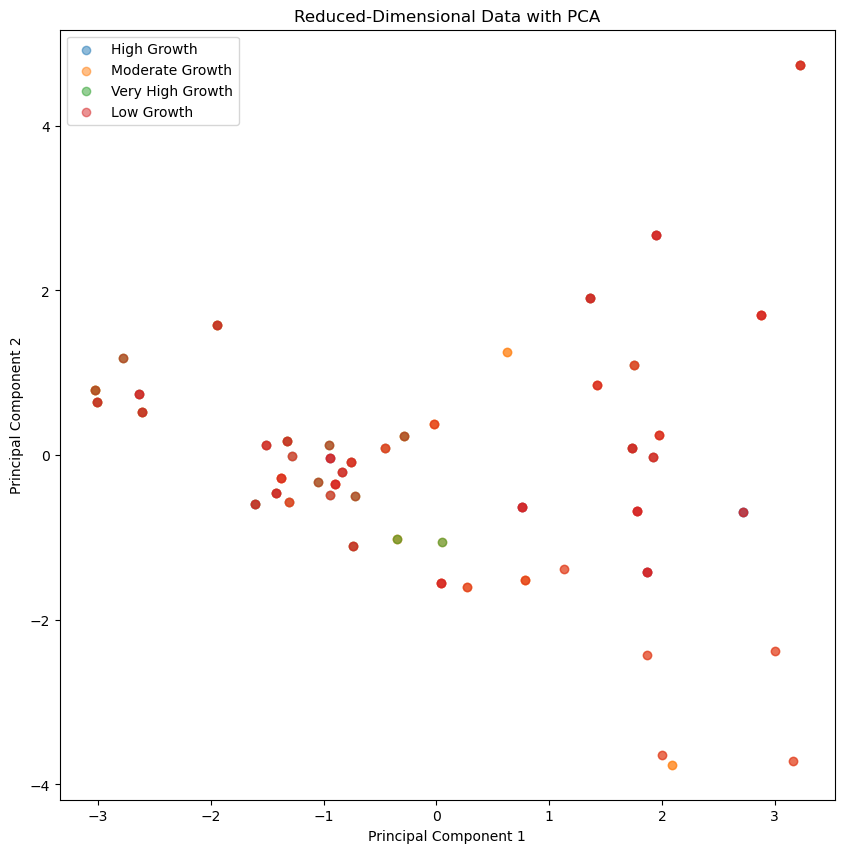

In [215]:

plt.figure(figsize=(10, 10))

for label_value in y.unique():
    indices = y == label_value
    plt.scatter(pca_optimal2[indices, 0], pca_optimal2[indices, 1], label=label_value, alpha=0.5, cmap='viridis')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Reduced-Dimensional Data with PCA')
plt.legend()
plt.show()





Here, we see that for PCA, the clustering looks differentiable enough in some places but overall just overlapping each other. Although the explained variance ratio is around 82%, one of the interesting parts is how as we iterate through each component, we see that explained variance ratio is as minimal as 10% and as high as 80%. But if we look at the components by itself, like PCA1, PCA2, etc, first PCA performs the best. So, cumulatively, they're almost attempting to capture the variance through the divide and conquer policy. Economic data is extremely highly dimensional, and hence it has done a good job in figuring out the differences. 

## T-distributed Stochastic Neighbor Embedding (t-SNE)

The T-distributed Stochastic Neighbor Embedding, also called as t-SNE is another dimensionality reduction technique that focuses on data separation when the data cannot be linearly separated or rather, by a straight line. It helps us understand how the data is arranged and to understand the underlying patterns in the dataset. As t-SNE uses probability distribution to map similar data points, and keep the dissimilar ones apart; it does using the Kullback-Leibler divergence between the low and high dimensional embedding. However, t-SNE with different initialisations can get us different results, due to which although preserves the structure of the original data, we still need to aware of our initial value. 



In [216]:
perplex_values = [1, 2, 3, 4, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 100]

for p in perplex_values:
    tsne = TSNE(n_components=2, perplexity=p, random_state=2339)
    X = tsne.fit_transform(x)
    
    avg = silhouette_score(X, y)
    
    print(f"Perplexity {p}: Silhouette Score = {avg}")

Perplexity 1: Silhouette Score = -0.08198484778404236
Perplexity 2: Silhouette Score = -0.055559705942869186
Perplexity 3: Silhouette Score = -0.06099412217736244
Perplexity 4: Silhouette Score = -0.06829451769590378
Perplexity 5: Silhouette Score = -0.0636918768286705
Perplexity 10: Silhouette Score = -0.06911653280258179
Perplexity 15: Silhouette Score = -0.09194755554199219
Perplexity 20: Silhouette Score = -0.08281858265399933
Perplexity 25: Silhouette Score = -0.08434560894966125
Perplexity 30: Silhouette Score = -0.0772019475698471
Perplexity 35: Silhouette Score = -0.09676646441221237
Perplexity 40: Silhouette Score = -0.11943919956684113
Perplexity 45: Silhouette Score = -0.06866727024316788
Perplexity 50: Silhouette Score = -0.1278223693370819
Perplexity 55: Silhouette Score = -0.09298355877399445
Perplexity 60: Silhouette Score = -0.08441784232854843
Perplexity 100: Silhouette Score = -0.0959368422627449


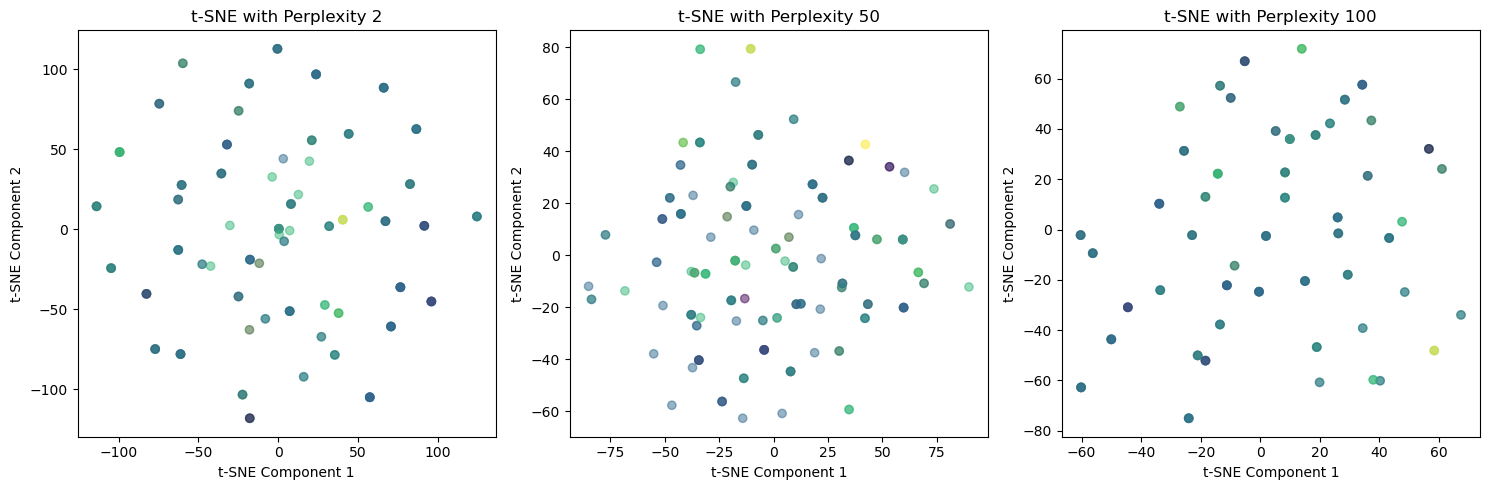

In [217]:
val = [2, 50, 100]

# Create subplots to compare t-SNE results with different perplexities
plt.figure(figsize=(15, 5))

for i, p in enumerate(val, 1):
    tsne = TSNE(n_components=3, perplexity=p, random_state=2339)
    X_tsne = tsne.fit_transform(x)

    plt.subplot(1, len(val), i)
    plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_encoded, cmap='viridis', alpha=0.5)
    plt.title(f't-SNE with Perplexity {p}')
    plt.xlabel('t-SNE Component 1')
    plt.ylabel('t-SNE Component 2')

plt.tight_layout()
plt.show()


The hyperparameter choice is perplexity in t-SNE, that controls the balance in preserving both local and glocal structure in a low-dimensional embedding. A higher perplexity value usually focuses on the global structure and lower perplexity on the local structure. As the choice of perplexity can really affect the choice of the output, it is often important to choose the optimal perplexity value which the code above attempts to achieve. 

All values of perplexity are negative in nature, and shows that all the clusters are going to overlap each other. This suggests poor separation between the clusters. This showcases the importance of the nature of the dataset, maybe due to the inherent structure of the data or due to the fact that there are outliers which cannot be removed when it comes to economic data. 

But here, it shows, perplexity value of 2 is closer to one so we will choose that.


In [218]:
tsne = TSNE(n_components=3, perplexity=2, random_state=42)
X_tsne = tsne.fit_transform(x)

sil_tsne = silhouette_samples(X_tsne, y)
print(sil_tsne[0:10])

avg_tsne_score = np.mean(sil_tsne)
print(f"Average Silhouette Score for t-SNE: {avg_tsne_score}")


[ 0.00318419  0.01473387 -0.02172711 -0.16240974  0.00434295  0.08726601
 -0.06315608  0.04417509  0.05092624 -0.14183001]
Average Silhouette Score for t-SNE: -0.06379585713148117


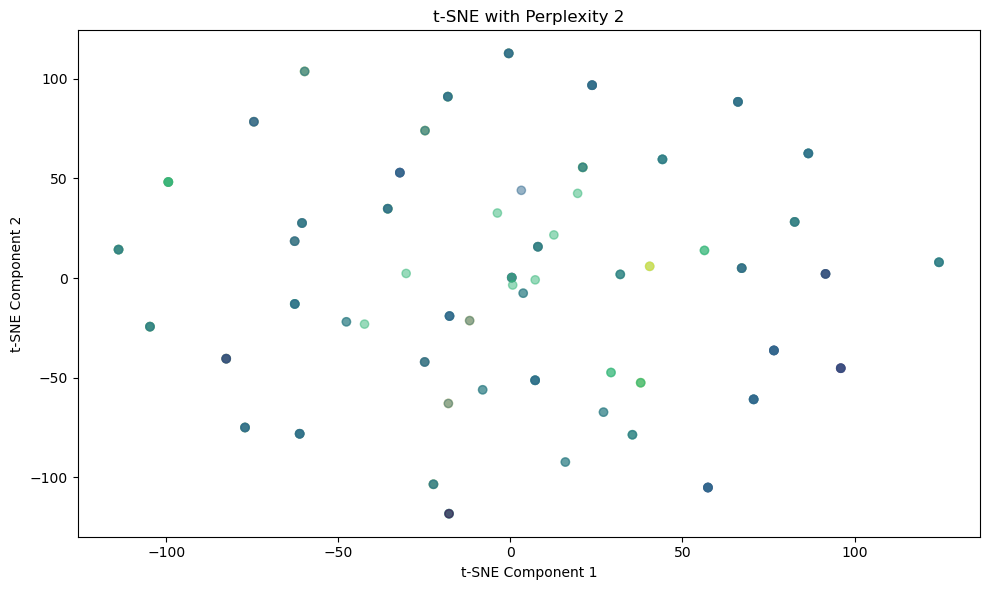

In [219]:
plt.figure(figsize=(10, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_encoded, cmap='viridis', alpha=0.5)
plt.title(f't-SNE with Perplexity {2}')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')

plt.tight_layout()
plt.show()

Here, we see that t-SNE has done an extremely bad job in predicting the clusters as there is no relation of each other with one another. 

### PCA vs t-SNE 

/var/folders/cm/1bq_zvw92w99j_5d1p5jq5v40000gn/T/ipykernel_46417/2199779955.py:6: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored



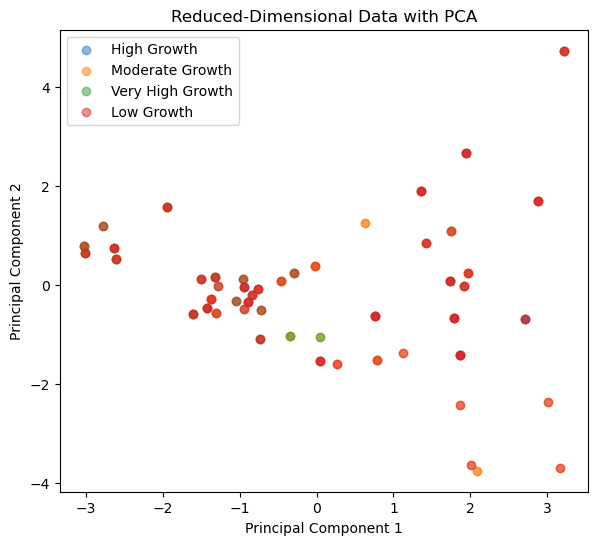

/var/folders/cm/1bq_zvw92w99j_5d1p5jq5v40000gn/T/ipykernel_46417/2199779955.py:17: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored



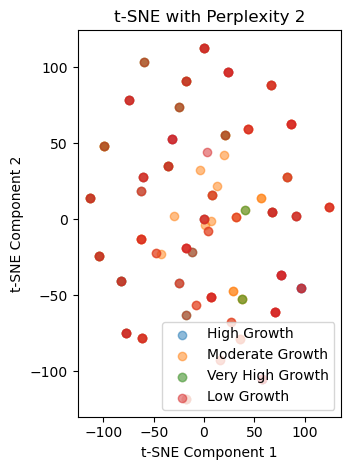

In [220]:
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
for label_value in y.unique():
    indices = y == label_value
    plt.scatter(pca_optimal2[indices, 0], pca_optimal2[indices, 1], label=label_value, alpha=0.5, cmap='viridis')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Reduced-Dimensional Data with PCA')
plt.legend()
plt.show()

plt.subplot(1, 2, 2)
for label_value in y.unique():
    indices = y == label_value
    plt.scatter(X_tsne[indices, 0], X_tsne[indices, 1], label=label_value, alpha=0.5, cmap='viridis')

# Adding legend
plt.legend()

plt.title(f't-SNE with Perplexity {2}')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')

plt.tight_layout()
plt.show()



### PCA vs t-SNE- the curse of dimensionality continued? 

Keeping in mind the fact that dimensionality can improve the model, there are often instances when utilising dimensionality techniques as a feature extraction method does not help the data in itself. This fundamentally showcases the importance of having a good dataset and choosing the feature selection/extraction methods on basis of your dataset's requirements.

However, if you look at both PCA and t-SNE, in terms of effectiveness, PCA's CMV or cumulative explained variance ratio is around 82%. One of the problems with t-SNE through my research is that there is no proper metric in my current range of understanding that numerically quanitfies t-SNE well. But, in terms of the silhoute score, either we should calculate for each point and then do the sum of it, or play around with the data. But in terms of the calculation, what I had done for both of them was looking at 'y', which is the label value and essentially find out silhoutte scores for each component of the transformed variable and then you find the average of it. 


In [221]:
print(f"Average Silhouette Score for t-SNE: {avg_tsne_score}")
print(f"Average Silhouette Score for PCA: {avg_sil_score}")

Average Silhouette Score for t-SNE: -0.06379585713148117
Average Silhouette Score for PCA: -0.09704378289382186


If you look at the silhoutte scores, we see that t-SNE actually seems to perform better than PCA but visualisation wise, I see more clustering for PCA than t-SNE. 

In terms of the quality of the cluster-separation, we see that both do a bad job at that since all the clusters are overlapping each other. Although PCA is effective for linear relationships and t-SNE is powerful in capturing the non-linear relationships of the data, both do not do a good job with clustering of my economic data. The reason being is in my opinion, the dataset is not that huge and most of the data is correlated to one another. 

As PCA is suiltable for larger datasets and t-SNE is suitable for smaller datasets, I wanted to attempt the combined approach

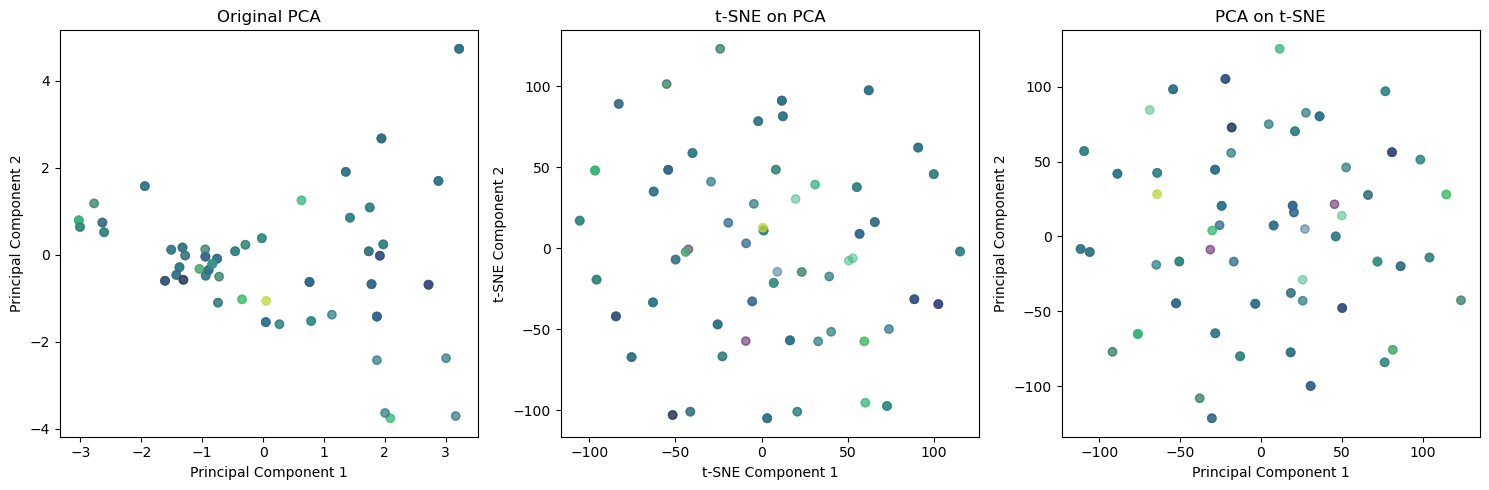

In [222]:


# t-sne on pca
tsne_on_pca = TSNE(n_components=3, perplexity=2, random_state=42)
tsne_pca = tsne_on_pca.fit_transform(pca_optimal2)

# pca on t-sne
pca_on_tsne = PCA(n_components=3)
pca_tsne = pca_on_tsne.fit_transform(tsne_pca)

# Visualize PCA and t-SNE plots together
plt.figure(figsize=(15, 5))

# orginal pca 
plt.subplot(1, 3, 1)
plt.scatter(pca_optimal2[:, 0], pca_optimal2[:, 1], c=y_encoded, cmap='viridis', alpha=0.5)
plt.title('Original PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# t-sne on pca
plt.subplot(1, 3, 2)
plt.scatter(tsne_pca[:, 0], tsne_pca[:, 1], c=y_encoded, cmap='viridis', alpha=0.5)
plt.title('t-SNE on PCA')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')

# pca on t-sne
plt.subplot(1, 3, 3)
plt.scatter(pca_tsne[:, 0], pca_tsne[:, 1], c=y_encoded, cmap='viridis', alpha=0.5)
plt.title('PCA on t-SNE')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.tight_layout()
plt.show()


We can see that, using the combined approach really just messed the data within itself that that pca by itself is the best option to go with. 


To summarise, the decision between PCA and t-SNE is influenced by the type of the data, the size of the dataset, and the specific goals of the research. Both strategies yield useful insights, and a well-considered mix of both methods can provide a more comprehensive knowledge of complex datasets. Yet, for mine, neither worked.

Sources:

Dimensionality Reduction

1. https://www.geeksforgeeks.org/dimensionality-reduction/

PCA: 

1. https://jfh.georgetown.domains/dsan5000/slides-and-labs/_site/content/slides/dimensionality-reduction/notes.html

2. https://www.stat.cmu.edu/~larry/=sml/dimension_reduction.pdf

3. https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

4. https://stats.stackexchange.com/questions/376981/cumulative-sum-of-pca-explained-variance-greater-than-1

5. https://github.com/scikit-learn/scikit-learn/issues/22974

6. https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html

7. https://www.researchgate.net/figure/A-scree-plot-for-explained-variance-and-eigenvalues-for-the-ten-Principal-Components_fig1_338833359

TSNE: 

1. https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html

2. https://jfh.georgetown.domains/dsan5000/slides-and-labs/_site/content/slides/dimensionality-reduction/notes.html#t-distributed-stochastic-neighbor-embedding.







